<a href="https://colab.research.google.com/github/pswami12/DataScienceFiles/blob/main/Class_7_AIDL_CNN_CIFAR10_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from tensorflow.keras.datasets import cifar10

### Load pre-shuffled MNIST data into train and test sets

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
num_train, img_rows, img_cols, img_channels =  X_train.shape
num_test, _, _, _ =  X_train.shape
num_classes = len(np.unique(y_train))
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


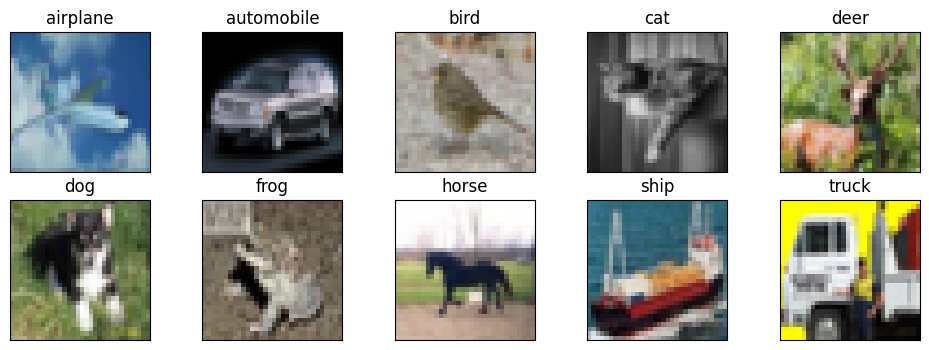

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(12,4))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [5]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [6]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class)
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [ ]:
# X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [7]:
(X_train, y_train), (X_test, y_test)
train_features = X_train.astype('float32')/255
test_features = X_train.astype('float32')/255
# convert class labels to binary class labels
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [8]:
y_train[:10]


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
model = Sequential()


model.add(Convolution2D(32, kernel_size = 3, activation='relu', input_shape=(32,32,3)))
model.add(Convolution2D(64, kernel_size = 3, activation='relu'))
model.add(Convolution2D(128, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(20, kernel_size = 1, activation='relu'))
model.add(Convolution2D(32, kernel_size = 3, activation='relu'))
model.add(Convolution2D(64, kernel_size = 3, activation='relu'))
model.add(Convolution2D(128, kernel_size = 3, activation='relu'))
model.add(Convolution2D(10, kernel_size = 7))
model.add(Flatten())
model.add(Activation('softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 20)        2580      
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        5792      
                                                        

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 26s 9ms/step - loss: 1.5752 - accuracy: 0.4286
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2164 - accuracy: 0.5647
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0616 - accuracy: 0.6231
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9607 - accuracy: 0.6618
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8911 - accuracy: 0.6880
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8197 - accuracy: 0.7134
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7644 - accuracy: 0.7296
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7041 - accuracy: 0.7526
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6604 - accuracy: 0.7676
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - l

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)

In [14]:
print(score)

[1.1415107250213623, 0.6484000086784363]
